# Part II - Ford GoBike System Data 
## by Diane Uwiduhaye



## Investigation Overview


In this investigation I wanted to know how Gender, age,days of the week, type of the user affect the interest of people in bike riding in the San Francisco Bay Area.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The dataset has a total of 183412 observations, and 15 variables.

I am going to present the key insights from the analysis I made on the dataset

In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [37]:
# load in the dataset into a pandas dataframe
#Load the dataset
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')


## Distribution of duration in Seconds
It is observed that duration in seconds of bike riding is not easy to visualise as we can use the duration in minutes. After visualizing in minutes we could see that most of trips seem to be short trips which the duration for trips is around 10 minutes.

In [38]:
# create new column from the duration_sec column
bike_df['duration_min'] = bike_df['duration_sec'] / 60
bike_df.drop(columns='duration_sec',axis=1,inplace=True)
bike_df['duration_min'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

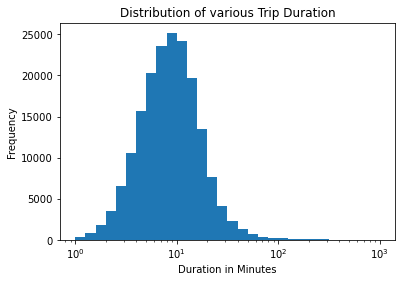

In [39]:
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = bike_df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');


## Distribution bike users who used bike sharing for all trip
As per the next plot, the number of users who used bike sharing for all trip scheme are very 
few compared to those who didn't.

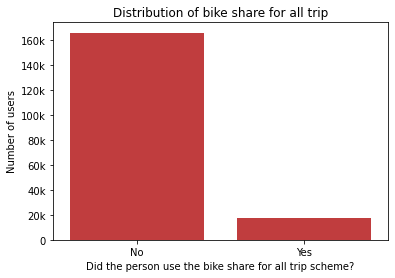

In [40]:
# import the seaborn package to be used
import seaborn as sns
# creating the plot
sns.countplot(data = bike_df, x = 'bike_share_for_all_trip', color = sns.color_palette()[3])
# annotating the plot
plt.yticks([0,20e3,40e3,60e3,80e3,100e3, 120e3,140e3,160e3],['0','20k','40k','60k','80k','100k', '120k','140k','160k'])

# labelling the created chart by using a function
plt.ylabel('Number of users') 
plt.xlabel ('Did the person use the bike share for all trip scheme?')
plt.title ('Distribution of bike share for all trip');


## Distribution of Bike User Type
In this project, we observed that most of users in the bike sharing scheme are those who have subscribed while a minimal number of users haven't.



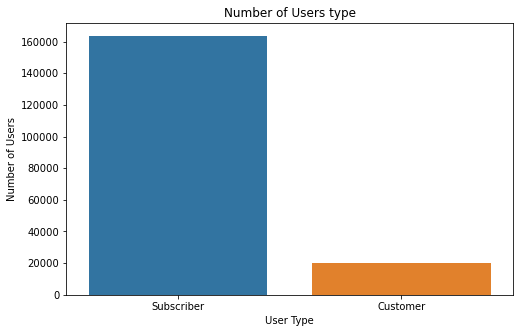

In [41]:
plt.figure(figsize=[8,5])
sns.countplot(data=bike_df,x='user_type',order=bike_df['user_type'].value_counts().index)
plt.title('Number of Users type')
plt.xlabel('User Type')
plt.ylabel('Number of Users');

## Distribution of Gender among bike users
As observed in the next plot, most of the bike sharing users are male gender followed by Female gender type while a small group of users reported to have other gender types.

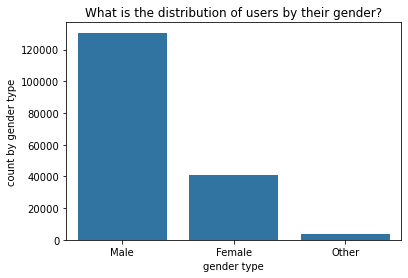

In [42]:
# counting users of bike sharing by their gender type
gender = bike_df.member_gender.value_counts()

# retrieving the index per gender type
gender['gender_ind'] = gender.index

# reseting gender index
gender = gender.reset_index(level = 0)

# renaming the gender index
gender.rename({'index':'gender_ind'}, axis = 1, inplace = True)
gender = gender[gender.index<3]

# changing the count of member_gender
gender['member_gender'] = gender.member_gender.astype(int)

## Creating the plot of the distribution of the users gender type
sns.barplot(data = gender, x = 'gender_ind', y = 'member_gender', color = base_color)
plt.xlabel('gender type')
plt.ylabel('count by gender type')
plt.title ('What is the distribution of users by their gender?');


## Distribution by Age Category
The above donutchart shows that most of the bike sharing users' age falls in 30-59 age category followed by those who are less than 30 years while 60 years and above age category has the least number of users.

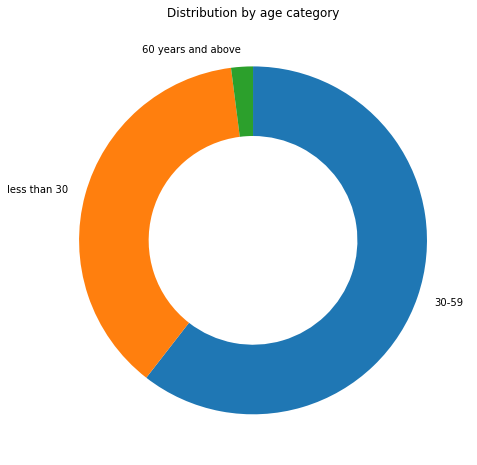

In [43]:
# creating a new variable named age
bike_df['age'] = 2019-bike_df.member_birth_year

# creating a new variable named age_category

bike_df.loc[bike_df['age']<30, 'age_category'] = 'less than 30'
bike_df.loc[(bike_df['age']>=30)&(bike_df['age']<60), 'age_category'] = '30-59'
bike_df.loc[bike_df['age']>60, 'age_category'] = '60 years and above'

# Creating the plot to Visualize the distribution of bike sharing users by their age category
plt.figure(figsize = (10,8))
sorted_counts = bike_df.age_category.value_counts()
plt.pie(sorted_counts,labels = sorted_counts.index, startangle=90, counterclock=False,wedgeprops = {'width' : 0.4})
plt.title('Distribution by age category');

## Correlation between Age and bike users type
Most of bike sharing users fall under the ages between 19 and 62 years old.
Users who have subscribed are the dominate the age range between 19 and 70 years olds.
Among subscribers, the highest number of users were recorded among those with 31 years old.
Among Customers (non-subscribers), the highest number of users was recorded amonth the users with 30 years old.

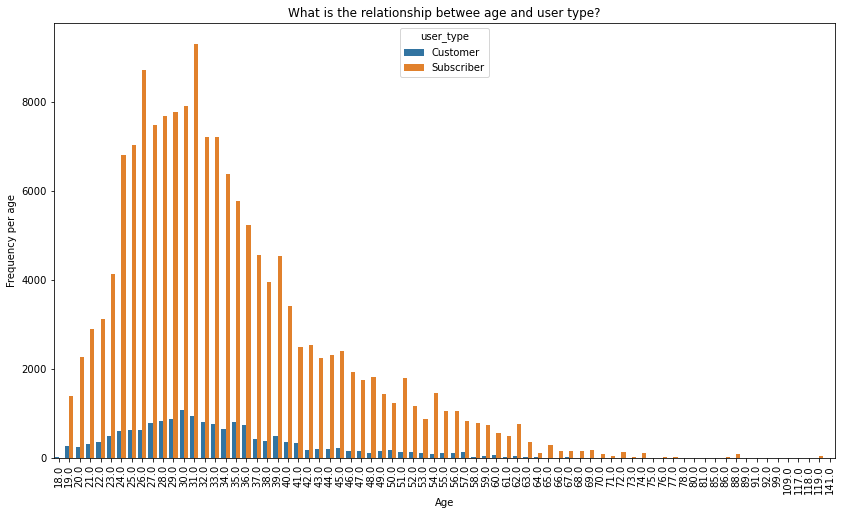

In [44]:

# color to be used
base_color = sns.color_palette()[0]

# creating the plot
plt.figure(figsize = (14,8))
sns.countplot(data = bike_df, x = 'age', hue = 'user_type')
plt.xticks(rotation = 90)
plt.title('What is the relationship betwee age and user type?')
plt.xlabel('Age')
plt.ylabel('Frequency per age');


## Relationship between age category and gender of bike users
This confirms the assumption that younger age bike users were riding longer than older bike users. But this is different when it comes to the comparison of users aged less than 30 years old compared to those aged between 30 to 59 years old.

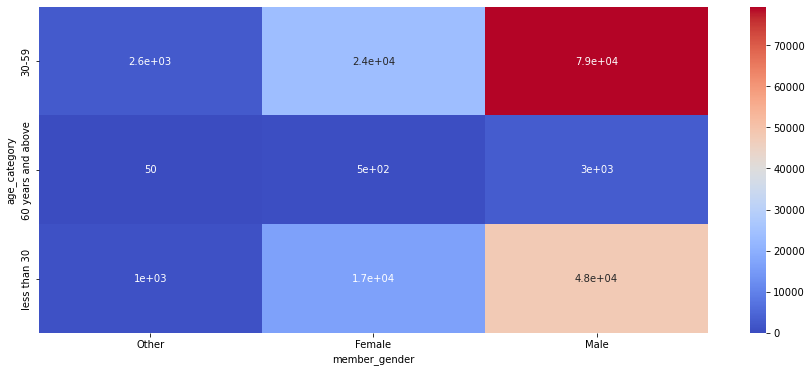

In [45]:
# Types of gender categories
gender_classes = ['Female','Male','Other']

# Returns the types for sedan_classes with the categories and orderedness
# Reference - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
gender_class = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
bike_df['member_gender'] = bike_df['member_gender'].astype(gender_class);

# finding the group sizes
age_gend_counts = bike_df.groupby(['age_category','member_gender']).size()

# reseting index
index_reset = age_gend_counts.reset_index(name = 'count')

#pivoting the subset to be plotted
final_counts = index_reset.pivot(index = 'age_category', columns= 'member_gender',values= 'count') 

# Creating a heatmap comparing Age category and Member gender
plt.figure(figsize = (15,6))
sns.heatmap(final_counts[['Other','Female','Male']],vmin=-1, annot=True, cmap = 'coolwarm');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt